In [38]:
# Generating a toy dataset.
# DO NOT MODIFY THIS PART

import numpy as np
import math
import random as rand

paras = list((rand.random() - 0.5 for _ in range(13)))

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def y_gen(x):
    h_11 = sigmoid(paras[0] * x[0] + paras[1] * x[1] + paras[2])
    h_12 = sigmoid(paras[3] * x[0] + paras[4] * x[1] + paras[5])
    h_13 = sigmoid(paras[6] * x[0] + paras[7] * x[1] + paras[8])
    h_21 = sigmoid(paras[9] * h_11 + paras[10] * h_12 + paras[11] * h_13 + paras[12])
    return h_21 + ((rand.random()-0.5)/100 if rand.random()>0.6 else 0)

n = 300
x = list(zip((rand.random() - 0.5 for _ in range(n)), (rand.random() - 0.5 for _ in range(n))))
y = list(map(y_gen, x))
y = [(i-min(y))/(max(y)-min(y)) for i in y]

from sklearn.model_selection import train_test_split

r = 0.2
x_train_valid, x_test, y_train_valid, y_test = train_test_split(x, y, test_size=r)
x_train, x_valid, y_train, y_valid = train_test_split(x_train_valid, y_train_valid, test_size=r)

In [39]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(hidden_size, input_size) * 0.01  # 3 neurons, each with 2 inputs
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01  # 1 neuron, each with 3 inputs from Layer 1
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

In [40]:
def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    return A1, A2

In [41]:
def compute_cost(Y, Y_hat):
    """Compute the mean squared error loss."""
    m = Y.shape[1]
    cost = (1. / (2 * m)) * np.sum((Y - Y_hat)**2)
    return cost

In [42]:
def backward_propagation(X, Y, A1, A2, W2):
    m = X.shape[1]
    dZ2 = A2 - Y
    dW2 = (1./m) * np.dot(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * A1 * (1 - A1)  # derivative of sigmoid
    dW1 = (1./m) * np.dot(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

In [43]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

Epoch 0: Training Cost = 0.019126758086993698, Validation Cost = 0.018502025133391622
Epoch 1000: Training Cost = 0.019123624029860127, Validation Cost = 0.018493436451521964
Epoch 2000: Training Cost = 0.01912332828301154, Validation Cost = 0.018493068712376135
Epoch 3000: Training Cost = 0.01912296310384423, Validation Cost = 0.018492702449503823
Epoch 4000: Training Cost = 0.019122507221381063, Validation Cost = 0.018492251643766562
Epoch 5000: Training Cost = 0.01912193446187341, Validation Cost = 0.01849169104213561
Epoch 6000: Training Cost = 0.01912121170431977, Validation Cost = 0.018490989775738514
Epoch 7000: Training Cost = 0.01912029684804603, Validation Cost = 0.018490108678605628
Epoch 8000: Training Cost = 0.019119136216272592, Validation Cost = 0.018488997877317635
Epoch 9000: Training Cost = 0.019117661230109818, Validation Cost = 0.018487593716547235


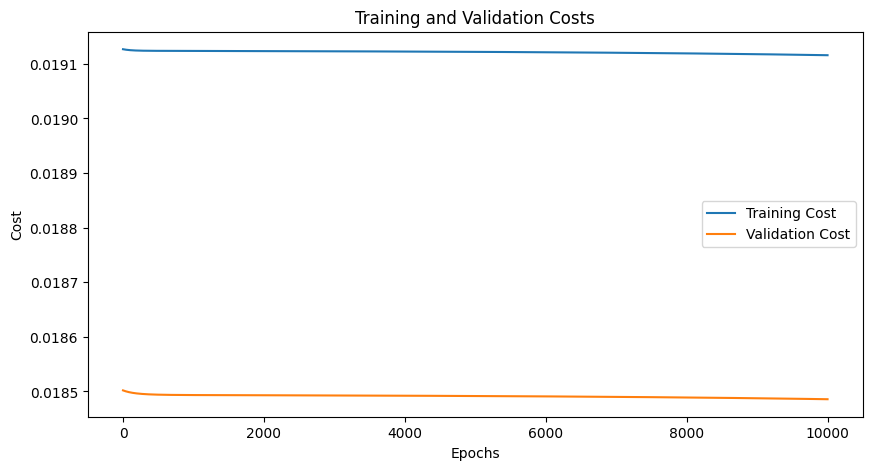

ValueError: x and y must be the same size

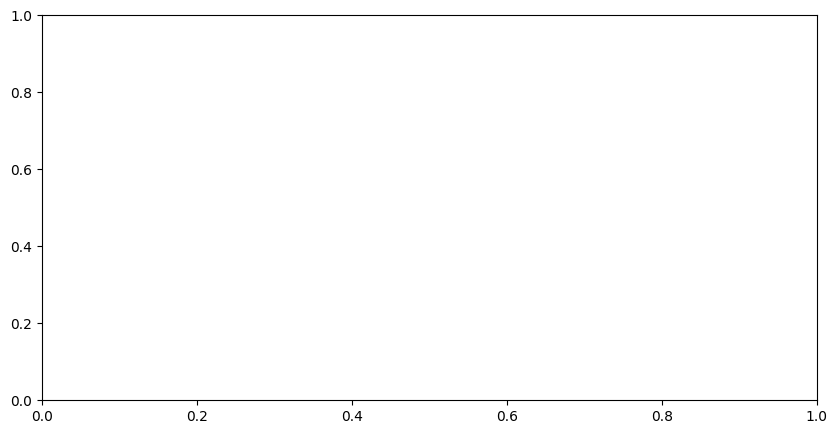

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def model(X_train, Y_train, X_valid, Y_valid, num_iterations=10000, learning_rate=, print_cost=False):
    # Ensure correct shapes
    X_train = np.array(x_train).T  # Convert list of tuples to (input_size, n_samples)
    Y_train = np.array(y_train).reshape(1, -1)  # Convert list to (1, n_samples)
    X_valid = np.array(x_valid).T  # Validation data
    Y_valid = np.array(y_valid).reshape(1, -1)  # Validation data

    input_size = X_train.shape[0]  # Number of features
    hidden_size = 3  # As per the network design
    output_size = 1  # Output layer size

    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    training_costs = []
    validation_costs = []

    for i in range(num_iterations):
        # Training
        A1_train, A2_train = forward_propagation(X_train, W1, b1, W2, b2)
        cost_train = compute_cost(A2_train, Y_train)
        training_costs.append(cost_train)

        # Validation
        _, A2_valid = forward_propagation(X_valid, W1, b1, W2, b2)
        cost_valid = compute_cost(A2_valid, Y_valid)
        validation_costs.append(cost_valid)

        # Backpropagation and update parameters
        dW1, db1, dW2, db2 = backward_propagation(X_train, Y_train, A1_train, A2_train, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if print_cost and i % 1000 == 0:
            print(f"Epoch {i}: Training Cost = {cost_train}, Validation Cost = {cost_valid}")

    # Plotting the costs
    plt.figure(figsize=(10, 5))
    plt.plot(training_costs, label='Training Cost')
    plt.plot(validation_costs, label='Validation Cost')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Training and Validation Costs')
    plt.legend()
    plt.show()

    # Predict on validation set for scatter plot
    Y_pred, _ = forward_propagation(X_valid, W1, b1, W2, b2)
    plt.figure(figsize=(10, 5))
    plt.scatter(Y_valid.flatten(), Y_pred.flatten(), alpha=0.5)
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.title('True and Predicted Output')
    plt.grid(True)
    plt.show()

    return W1, b1, W2, b2

# Example usage:
# Assume you have x_train, y_train, x_valid, y_valid properly formatted as numpy arrays or lists
parameters = model(x_train, y_train, x_valid, y_valid, num_iterations=10000, learning_rate=0.01, print_cost=True)